# 1，展示结果，以各类ETF作为“股票池”

In [1]:
import cv_strategy
import pandas as pd
import tushare as ts
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import akshare as ak

In [43]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360',                  # 教育

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M')
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

2023-06-29-09:32:25
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


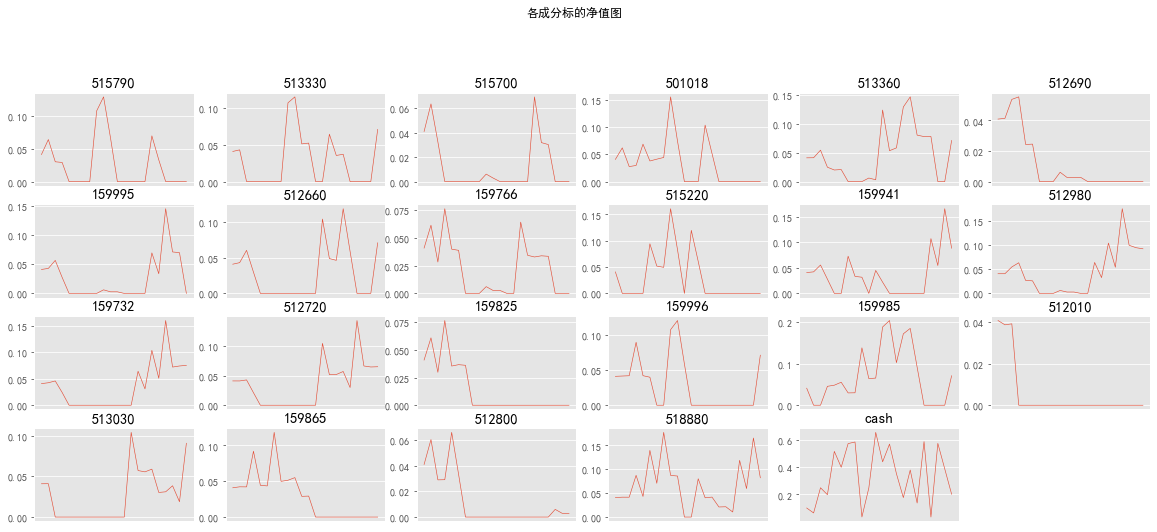

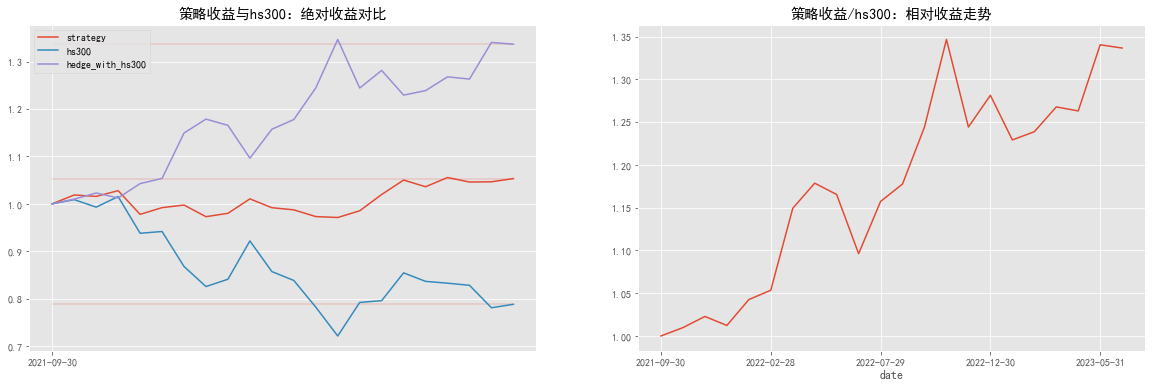

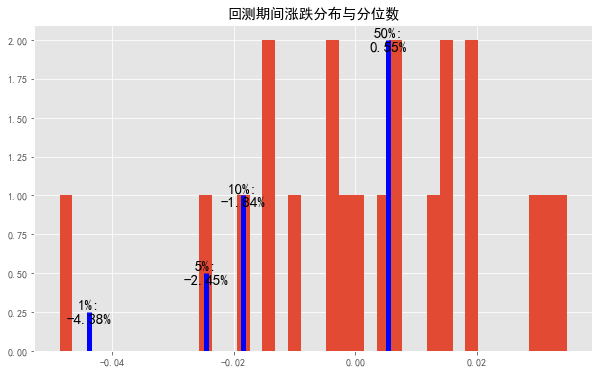

近5日组合净值：
date
2023-02-28    1.035985
2023-03-31    1.055457
2023-04-28    1.045888
2023-05-31    1.046429
2023-06-29    1.053216
dtype: object
近5日组合涨跌：
date
2023-02-28   -0.013430
2023-03-31    0.018796
2023-04-28   -0.009066
2023-05-31    0.000517
2023-06-29    0.006486
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.191415  0.000000
512980  0.088047 -0.024096
513030  0.086143  0.056636
159941  0.084153  0.066924
518880  0.078149 -0.006415
159732  0.071619  0.015198
159985  0.067242  0.104277
513360  0.067242  0.030769
512660  0.067242  0.016729
159996  0.067242  0.105815
513330  0.067242  0.095607
512720  0.061494  0.006163
512800  0.002772 -0.006518
159825       0.0  0.010855
515790       0.0  0.045802
515700       0.0  0.006141
515220       0.0  0.028629
159995       0.0 -0.048182
159865       0.0  0.005935
159766       0.0 -0.022051
512010       0.0 -0.034325
501018       0.0  0.021336
512690       0.0  0.025066


In [44]:
am.visualization(control_group='hs300')
# print(am.compare.pct_change().tail(5))

# 2，cv_strategy介绍

## 2.1：底层逻辑与参数介绍

cv，即变异系数，度量数据离散程度的一种方式，表达式如下。可以理解为“围绕平均值的合理波动范围”。例如 cv = 0.1, 即表示“大多数情况下，围绕均值的合理波动范围为±10%”
$$cv = \frac{标准差}{平均值}$$

以动态视角来理解cv：

当cv增加时（dcv > 0），数组有远离均值的趋势，此时如果数组最后一个数高于均值，则可理解为“数组在增长过程中远离均值”此时建议增加该类资产配置。而如果数组最后一个值小于均值，且dcv > 0，则意味着“数组在下降过程中远离均值”，此时建议及时止损。

而当cv减小时（dcv < 0），数组有向均值靠拢的趋势。此时如果最新值大于均值，则意味着上升动能不足，此时选择撤出部分投资，以降低该类资产对整体组合带来的波动。而当最新值小于均值，则意味着资产价格快速下跌的趋势结束，但并不等同于资产价格回升，资产仍有可能缓慢下降或企稳筑底，此时如果选择抄底并不稳妥，建议观望或在有很大把握的情况下适当参与。

据上所述，策略中相应设置了3个参数：


$买入比例：\frac{4}{标的池中标的数量} (默认值，表示“在当前时点，如果标的池中有1/4的标的出现买入信号，则会花光所有现金用于加仓”)$


$收益增强比例：0.5（默认值，表示当上升行情结束后，撤出当前持仓的1/2以降低波动对整体组合的影响）$


$止损比例：1（默认值，表示当资产出现下跌情况后，卖出当前持仓的全部以止损）$

## 2.2：以沪深300指数的可视化说明

In [8]:
import tushare as ts
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
hs300 = ts.get_k_data('hs300').set_index('date')['close']
hs300_ma50 = hs300.rolling(50).mean()
hs300_std50 = hs300.rolling(50).std()
hs300_cv50 = hs300_std50/hs300_ma50

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


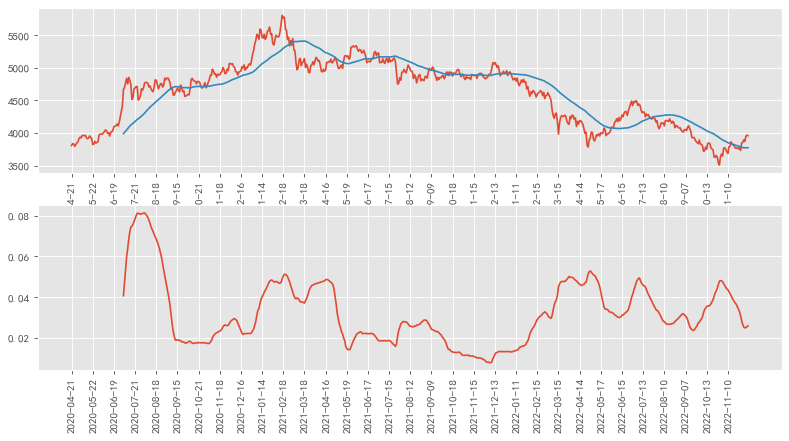

In [16]:
plt.figure(figsize=[12,6],dpi=80)
ax1 = plt.subplot(211)
ax1.plot(hs300)
ax1.plot(hs300_ma50)
ax1.set_xticks(hs300.index[::20])
ax1.set_xticklabels(hs300.index[::20],rotation=90)

ax2=plt.subplot(212,sharex=ax1)
ax2.plot(hs300_cv50)
ax2.set_xticks(hs300.index[::20])
ax2.set_xticklabels(hs300.index[::20],rotation=90)

plt.show()

# 3，经cv_strategy优化后的曲线：

对难以控制的资产类别可降低波动率；对强势的资产不仍有较好收益；对风险较大的资产可及时撤出

以沪深300指数、比亚迪（002594）、恒瑞医药（600276）为例，可以明显看出策略对于控制波动方面有显著作用

## 3.1：对难以把握的资产：降低波动、增加可控性：沪深300指数

In [175]:
pool=['399372','399373','399374','399375','399376','399377']
test_pool = [pool]
test = cv_strategy.cv_strategy(pool)
test.get_close(date_start = '2014-04-01',ktype_='D')

2023-03-24-11:26:47
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


2017-06-19
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
买——追涨： 399373
2017-06-20
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-06-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-07-03
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2017-07-04
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-18
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-19
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-24
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-25
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-01-31
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-02-01
无操作: 399372
卖——割肉： 399374
无操作: 399376
卖——逃顶： 399377
卖——逃顶： 399375
无操作: 399373
2018-02

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-20
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-25
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-06-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-07-05
无操作:

无操作: 399372
无操作: 399374
无操作: 399376
买——追涨： 399377
无操作: 399375
买——追涨： 399373
2018-11-20
无操作: 399372
无操作: 399374
无操作: 399376
卖——逃顶： 399377
无操作: 399375
卖——逃顶： 399373
2018-11-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
卖——割肉： 399373
2018-11-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-11-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-12-03
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2018-12-04
无操作: 399372
无操作: 399374
买——追涨： 399376
买——追涨： 399377
买——追涨： 399375
无操作: 3993

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-04-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-04-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-06
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-07
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-08
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-09
无操作: 399372
卖——割肉： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-10
卖——割肉： 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——割肉： 399375
卖——割肉： 399373
2019-05-13
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-14
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-15
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05-16
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-05

2019-11-21
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
卖——割肉： 399373
2019-11-22
卖——割肉： 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-25
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-26
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-27
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-28
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-11-29
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-05
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2019-12-06
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作:

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-18
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-19
买——追涨： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2020-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-23
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
无操作: 399373
2020-06-24
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-06-29
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
卖——割肉： 399375
无操作: 399373
2020-06-30
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-07-01
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
买——追涨： 399373
2020-07-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-07-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-07-06
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 3993

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-25
卖——逃顶： 399372
无操作: 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-26
无操作: 399372
卖——逃顶： 399374
买——追涨： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-27
无操作: 399372
无操作: 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-11-30
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-01
买——追涨： 399372
买——追涨： 399374
买——追涨： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-02
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-03
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2020-12-07
买——追涨： 399372
无操作: 399374
无操作: 399376
卖——逃顶： 399377
无操作: 399375
无操作: 399373
2020-12-08
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
无操作: 399373
2020-12-09
无操作: 399372
卖——逃顶： 399374
卖——逃顶： 399376
无操作: 399377
买——追涨： 39

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2021-06-04
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
无操作: 399373
2021-06-07
卖——逃顶： 399372
无操作: 399374
无操作: 399376
卖——逃顶： 399377
无操作: 399375
无操作: 399373
2021-06-08
无操作: 399372
卖——逃顶： 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-09
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-10
无操作: 399372
买——追涨： 399374
买——追涨： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-11
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-15
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
卖——割肉： 399375
无操作: 399373
2021-06-16
无操作: 399372
无操作: 399374
卖——逃顶： 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-17
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-18
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-06-21
卖——逃顶： 399372
无操作: 399374
买——追涨： 399376
无操作: 399377
无操作: 399375

无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-02
无操作: 399372
无操作: 399374
无操作: 399376
卖——割肉： 399377
卖——割肉： 399375
无操作: 399373
2021-11-03
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-04
买——追涨： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-05
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-08
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-09
卖——逃顶： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-10
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-11
买——追涨： 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-12
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-15
卖——逃顶： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2021-11-16
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 39

2022-06-08
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-09
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-10
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-13
买——追涨： 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2022-06-14
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-15
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-16
无操作: 399372
卖——逃顶： 399374
无操作: 399376
无操作: 399377
卖——逃顶： 399375
卖——逃顶： 399373
2022-06-17
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-20
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-21
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-22
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2022-06-23
无操作: 399372
无操作: 399374
买——追涨： 399376
无操作: 399377
无操作: 399375


无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-05
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-06
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-09
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-10
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-11
买——追涨： 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-12
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-13
无操作: 399372
买——追涨： 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-16
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-17
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-18
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
无操作: 399375
无操作: 399373
2023-01-19
无操作: 399372
无操作: 399374
无操作: 399376
无操作: 399377
买——追涨： 399375
无操作: 399373
2023-01-2

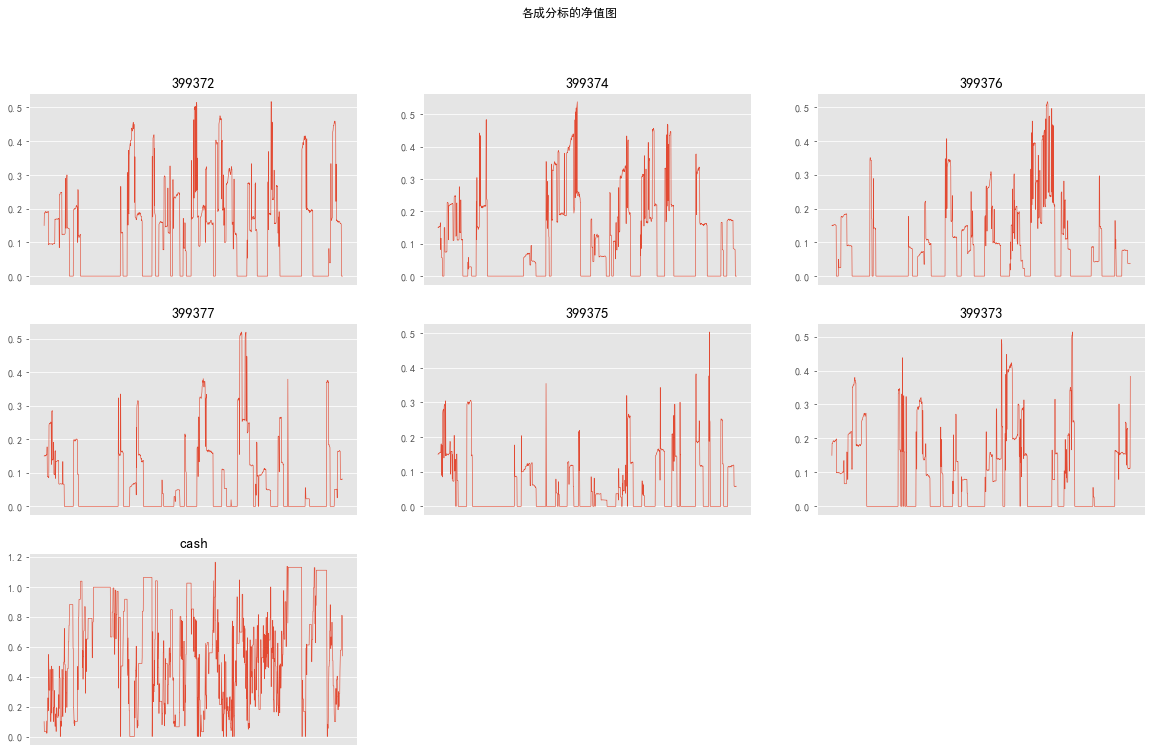

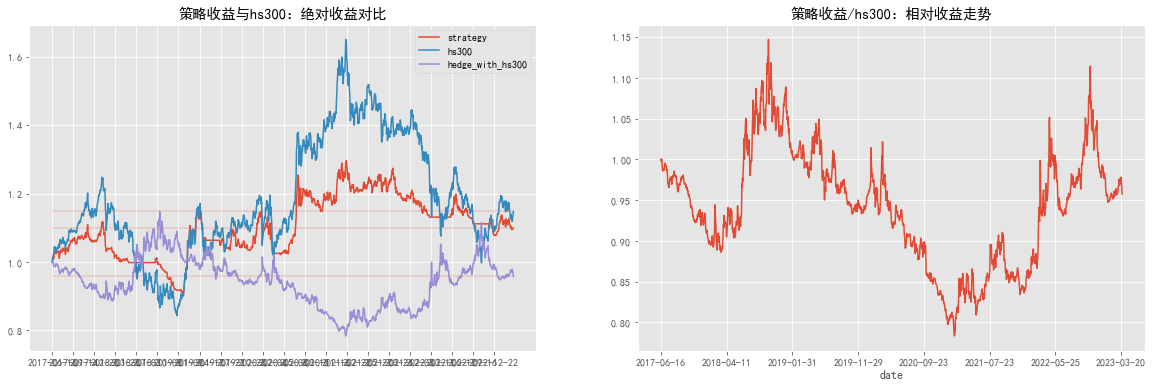

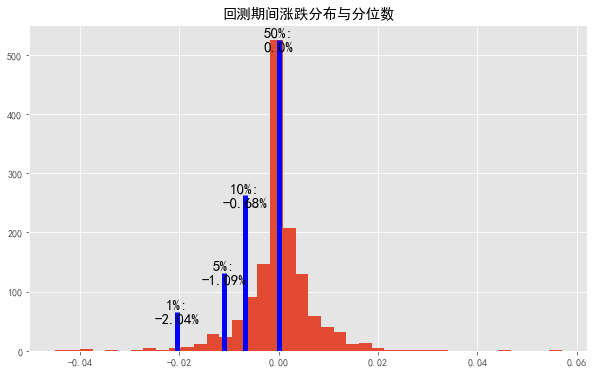

近5日组合净值：
date
2023-03-17    1.096937
2023-03-20     1.09522
2023-03-21    1.096066
2023-03-22    1.097567
2023-03-23    1.099188
dtype: object
近5日组合涨跌：
date
2023-03-17    0.002388
2023-03-20   -0.001565
2023-03-21    0.000772
2023-03-22    0.001370
2023-03-23    0.001478
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash     0.49043  0.000000
399373   0.34845  0.009809
399377  0.074034  0.000770
399375  0.052869  0.005308
399376  0.034217  0.006189
399372       0.0  0.011261
399374       0.0  0.010710


In [179]:
test.run(operation_pct_in=1/3,operation_pct_out=.5,operation_pct_clr=1,period=50,)
test.visualization(control_group='hs300')

## 3.2：对强势资产：降低波动同时对收益影响不大：比亚迪

In [45]:
test_pool = ['399905']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(date_start='2013-01-01',ktype_='D')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2023-06-15-16:47:33
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2013-03-22
无操作: 399905
2013-03-25
无操作: 399905
2013-03-26
无操作: 399905
2013-03-27
无操作: 399905
2013-03-28
无操作: 399905
2013-03-29
无操作: 399905
2013-04-01
无操作: 399905
2013-04-02
卖——割肉： 399905
2013-04-03
无操作: 399905
2013-04-08
无操作: 399905
2013-04-09
无操作: 399905
2013-04-10
无操作: 399905
2013-04-11
无操作: 399905
2013-04-12
无操作: 399905
2013-04-15
无操作: 399905
2013-04-16
无操作: 399905
2013-04-17
无操作: 399905
2013-04-18
无操作: 399905
2013-04-19
无操作: 399905
2013-04-22
无操作: 399905
2013-04-23
无操作: 399905
2013-04-24
无操作: 399905
2013-04-25
无操作: 399905
2013-04-26
无操作: 399905
2013-05-02
无操作: 399905
2013-05-03
无操作: 399905
2013-05-06
无操作: 399905
2013-05-07
无操作: 399905
2013-05-08
无操作: 399905
2013-05-09
无操作: 399905
2013-05-10
买——追涨： 399905
2013-05-13
无操作: 399905
2013-05-14
无操作: 399905
2013-05-15
无操作: 399905
2013-05-16
无操作: 399905
2013-05-17
无操作: 399905
2013-05-20
无操作: 399905
2013-05-21
无操作: 39990

无操作: 399905
2014-12-05
无操作: 399905
2014-12-08
无操作: 399905
2014-12-09
卖——逃顶： 399905
2014-12-10
买——追涨： 399905
2014-12-11
无操作: 399905
2014-12-12
无操作: 399905
2014-12-15
无操作: 399905
2014-12-16
无操作: 399905
2014-12-17
无操作: 399905
2014-12-18
无操作: 399905
2014-12-19
无操作: 399905
2014-12-22
无操作: 399905
2014-12-23
卖——逃顶： 399905
2014-12-24
无操作: 399905
2014-12-25
无操作: 399905
2014-12-26
无操作: 399905
2014-12-29
无操作: 399905
2014-12-30
无操作: 399905
2014-12-31
无操作: 399905
2015-01-05
无操作: 399905
2015-01-06
无操作: 399905
2015-01-07
无操作: 399905
2015-01-08
无操作: 399905
2015-01-09
无操作: 399905
2015-01-12
无操作: 399905
2015-01-13
无操作: 399905
2015-01-14
无操作: 399905
2015-01-15
无操作: 399905
2015-01-16
无操作: 399905
2015-01-19
无操作: 399905
2015-01-20
无操作: 399905
2015-01-21
买——追涨： 399905
2015-01-22
卖——逃顶： 399905
2015-01-23
无操作: 399905
2015-01-26
无操作: 399905
2015-01-27
无操作: 399905
2015-01-28
无操作: 399905
2015-01-29
无操作: 399905
2015-01-30
无操作: 399905
2015-02-02
无操作: 399905
2015-02-03
无操作: 399905
2015-02-04
无操作: 399905
2015-02-05
无

无操作: 399905
2016-09-14
卖——割肉： 399905
2016-09-19
无操作: 399905
2016-09-20
无操作: 399905
2016-09-21
无操作: 399905
2016-09-22
无操作: 399905
2016-09-23
无操作: 399905
2016-09-26
无操作: 399905
2016-09-27
无操作: 399905
2016-09-28
无操作: 399905
2016-09-29
无操作: 399905
2016-09-30
无操作: 399905
2016-10-10
买——追涨： 399905
2016-10-11
无操作: 399905
2016-10-12
无操作: 399905
2016-10-13
卖——逃顶： 399905
2016-10-14
无操作: 399905
2016-10-17
无操作: 399905
2016-10-18
无操作: 399905
2016-10-19
无操作: 399905
2016-10-20
无操作: 399905
2016-10-21
无操作: 399905
2016-10-24
无操作: 399905
2016-10-25
无操作: 399905
2016-10-26
买——追涨： 399905
2016-10-27
无操作: 399905
2016-10-28
卖——逃顶： 399905
2016-10-31
无操作: 399905
2016-11-01
无操作: 399905
2016-11-02
买——追涨： 399905
2016-11-03
无操作: 399905
2016-11-04
卖——逃顶： 399905
2016-11-07
无操作: 399905
2016-11-08
买——追涨： 399905
2016-11-09
无操作: 399905
2016-11-10
无操作: 399905
2016-11-11
无操作: 399905
2016-11-14
无操作: 399905
2016-11-15
无操作: 399905
2016-11-16
无操作: 399905
2016-11-17
无操作: 399905
2016-11-18
无操作: 399905
2016-11-21
无操作: 399905
2016-1

无操作: 399905
2018-06-22
无操作: 399905
2018-06-25
无操作: 399905
2018-06-26
无操作: 399905
2018-06-27
无操作: 399905
2018-06-28
无操作: 399905
2018-06-29
无操作: 399905
2018-07-02
无操作: 399905
2018-07-03
无操作: 399905
2018-07-04
无操作: 399905
2018-07-05
无操作: 399905
2018-07-06
无操作: 399905
2018-07-09
无操作: 399905
2018-07-10
无操作: 399905
2018-07-11
无操作: 399905
2018-07-12
无操作: 399905
2018-07-13
无操作: 399905
2018-07-16
无操作: 399905
2018-07-17
无操作: 399905
2018-07-18
无操作: 399905
2018-07-19
无操作: 399905
2018-07-20
无操作: 399905
2018-07-23
无操作: 399905
2018-07-24
无操作: 399905
2018-07-25
无操作: 399905
2018-07-26
无操作: 399905
2018-07-27
无操作: 399905
2018-07-30
无操作: 399905
2018-07-31
无操作: 399905
2018-08-01
无操作: 399905
2018-08-02
无操作: 399905
2018-08-03
无操作: 399905
2018-08-06
无操作: 399905
2018-08-07
无操作: 399905
2018-08-08
无操作: 399905
2018-08-09
无操作: 399905
2018-08-10
无操作: 399905
2018-08-13
无操作: 399905
2018-08-14
无操作: 399905
2018-08-15
无操作: 399905
2018-08-16
无操作: 399905
2018-08-17
无操作: 399905
2018-08-20
无操作: 399905
2018-08-21
无操作: 399905

无操作: 399905
2020-04-09
无操作: 399905
2020-04-10
无操作: 399905
2020-04-13
无操作: 399905
2020-04-14
无操作: 399905
2020-04-15
无操作: 399905
2020-04-16
无操作: 399905
2020-04-17
无操作: 399905
2020-04-20
无操作: 399905
2020-04-21
无操作: 399905
2020-04-22
无操作: 399905
2020-04-23
无操作: 399905
2020-04-24
无操作: 399905
2020-04-27
无操作: 399905
2020-04-28
无操作: 399905
2020-04-29
无操作: 399905
2020-04-30
无操作: 399905
2020-05-06
无操作: 399905
2020-05-07
无操作: 399905
2020-05-08
无操作: 399905
2020-05-11
无操作: 399905
2020-05-12
无操作: 399905
2020-05-13
无操作: 399905
2020-05-14
买——追涨： 399905
2020-05-15
卖——逃顶： 399905
2020-05-18
无操作: 399905
2020-05-19
无操作: 399905
2020-05-20
无操作: 399905
2020-05-21
无操作: 399905
2020-05-22
无操作: 399905
2020-05-25
无操作: 399905
2020-05-26
无操作: 399905
2020-05-27
无操作: 399905
2020-05-28
无操作: 399905
2020-05-29
买——追涨： 399905
2020-06-01
无操作: 399905
2020-06-02
无操作: 399905
2020-06-03
无操作: 399905
2020-06-04
无操作: 399905
2020-06-05
卖——逃顶： 399905
2020-06-08
无操作: 399905
2020-06-09
买——追涨： 399905
2020-06-10
无操作: 399905
2020-06-11
卖

买——追涨： 399905
2021-12-24
卖——逃顶： 399905
2021-12-27
无操作: 399905
2021-12-28
买——追涨： 399905
2021-12-29
卖——逃顶： 399905
2021-12-30
买——追涨： 399905
2021-12-31
卖——逃顶： 399905
2022-01-04
买——追涨： 399905
2022-01-05
卖——逃顶： 399905
2022-01-06
无操作: 399905
2022-01-07
无操作: 399905
2022-01-10
无操作: 399905
2022-01-11
无操作: 399905
2022-01-12
无操作: 399905
2022-01-13
无操作: 399905
2022-01-14
无操作: 399905
2022-01-17
无操作: 399905
2022-01-18
无操作: 399905
2022-01-19
无操作: 399905
2022-01-20
卖——割肉： 399905
2022-01-21
无操作: 399905
2022-01-24
无操作: 399905
2022-01-25
无操作: 399905
2022-01-26
无操作: 399905
2022-01-27
无操作: 399905
2022-01-28
无操作: 399905
2022-02-07
无操作: 399905
2022-02-08
无操作: 399905
2022-02-09
无操作: 399905
2022-02-10
无操作: 399905
2022-02-11
无操作: 399905
2022-02-14
无操作: 399905
2022-02-15
无操作: 399905
2022-02-16
无操作: 399905
2022-02-17
无操作: 399905
2022-02-18
无操作: 399905
2022-02-21
无操作: 399905
2022-02-22
无操作: 399905
2022-02-23
无操作: 399905
2022-02-24
无操作: 399905
2022-02-25
无操作: 399905
2022-02-28
无操作: 399905
2022-03-01
无操作: 399905
2022

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


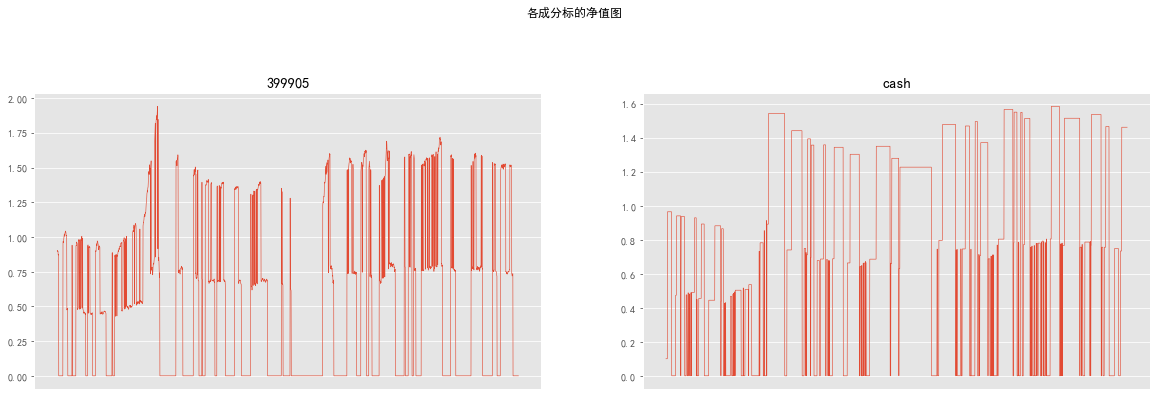

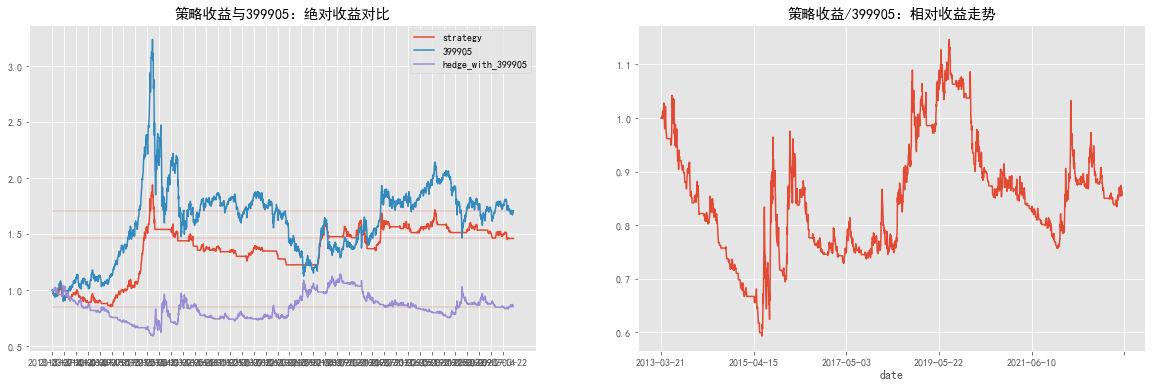

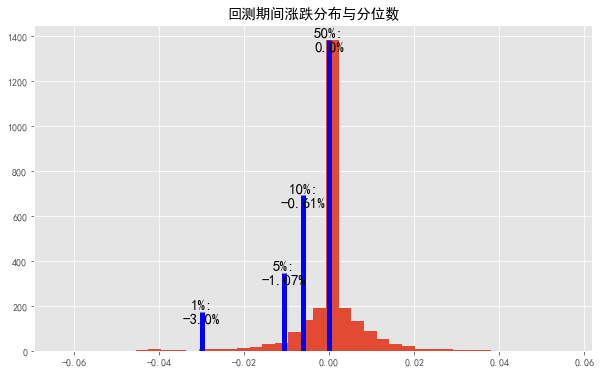

近5日组合净值：
date
2023-06-09    1.463111
2023-06-12    1.463111
2023-06-13    1.463111
2023-06-14    1.463111
2023-06-15    1.463111
dtype: object
近5日组合涨跌：
date
2023-06-09    0.0
2023-06-12    0.0
2023-06-13    0.0
2023-06-14    0.0
2023-06-15    0.0
dtype: float64
今日持仓比例与涨跌幅：
         仓位      今日涨幅
cash    1.0  0.000000
399905  0.0  0.008724


In [46]:
test.visualization(control_group='399905')

## 3.3：对弱势资产：有限参与，保证安全：恒瑞医药

In [39]:
test_pool = ['600276']
test = cv_strategy.cv_strategy(test_pool)
test.get_close(ktype_='D')
test.run(operation_pct_in=1,operation_pct_out=.5,operation_pct_clr=1,period=50)

2022-12-08-12:12:27
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
2020-07-07
买——追涨： 600276
2020-07-08
无操作: 600276
2020-07-09
无操作: 600276
2020-07-10
无操作: 600276
2020-07-13
无操作: 600276
2020-07-14
无操作: 600276
2020-07-15
无操作: 600276
2020-07-16
卖——逃顶： 600276
2020-07-17
买——追涨： 600276
2020-07-20
无操作: 600276
2020-07-21
无操作: 600276
2020-07-22
无操作: 600276
2020-07-23
无操作: 600276
2020-07-24
卖——逃顶： 600276
2020-07-27
无操作: 600276
2020-07-28
无操作: 600276
2020-07-29
无操作: 600276
2020-07-30
无操作: 600276
2020-07-31
无操作: 600276
2020-08-03
无操作: 600276
2020-08-04
无操作: 600276
2020-08-05
无操作: 600276
2020-08-06
无操作: 600276
2020-08-07
无操作: 600276
2020-08-10
无操作: 600276
2020-08-11
无操作: 600276
2020-08-12
无操作: 600276
2020-08-13
无操作: 600276
2020-08-14
无操作: 600276
2020-08-17
无操作: 600276
2020-08-18
无操作: 600276
2020-08-19
无操作: 600276
2020-08-20
无操作: 600276
2020-08-21
无操作: 600276
2020-08-24
无操作: 600276
2020-08-25
无操作: 600276
2020-08-26
无操作: 600276
2020-08-27
无操作: 6

无操作: 600276
2021-12-29
无操作: 600276
2021-12-30
无操作: 600276
2021-12-31
无操作: 600276
2022-01-04
无操作: 600276
2022-01-05
无操作: 600276
2022-01-06
无操作: 600276
2022-01-07
无操作: 600276
2022-01-10
无操作: 600276
2022-01-11
无操作: 600276
2022-01-12
无操作: 600276
2022-01-13
无操作: 600276
2022-01-14
无操作: 600276
2022-01-17
无操作: 600276
2022-01-18
无操作: 600276
2022-01-19
无操作: 600276
2022-01-20
无操作: 600276
2022-01-21
无操作: 600276
2022-01-24
无操作: 600276
2022-01-25
无操作: 600276
2022-01-26
无操作: 600276
2022-01-27
无操作: 600276
2022-01-28
无操作: 600276
2022-02-07
无操作: 600276
2022-02-08
无操作: 600276
2022-02-09
无操作: 600276
2022-02-10
无操作: 600276
2022-02-11
无操作: 600276
2022-02-14
无操作: 600276
2022-02-15
无操作: 600276
2022-02-16
无操作: 600276
2022-02-17
无操作: 600276
2022-02-18
无操作: 600276
2022-02-21
无操作: 600276
2022-02-22
无操作: 600276
2022-02-23
无操作: 600276
2022-02-24
无操作: 600276
2022-02-25
无操作: 600276
2022-02-28
无操作: 600276
2022-03-01
无操作: 600276
2022-03-02
无操作: 600276
2022-03-03
无操作: 600276
2022-03-04
无操作: 600276
2022-03-07
无操作: 600276

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


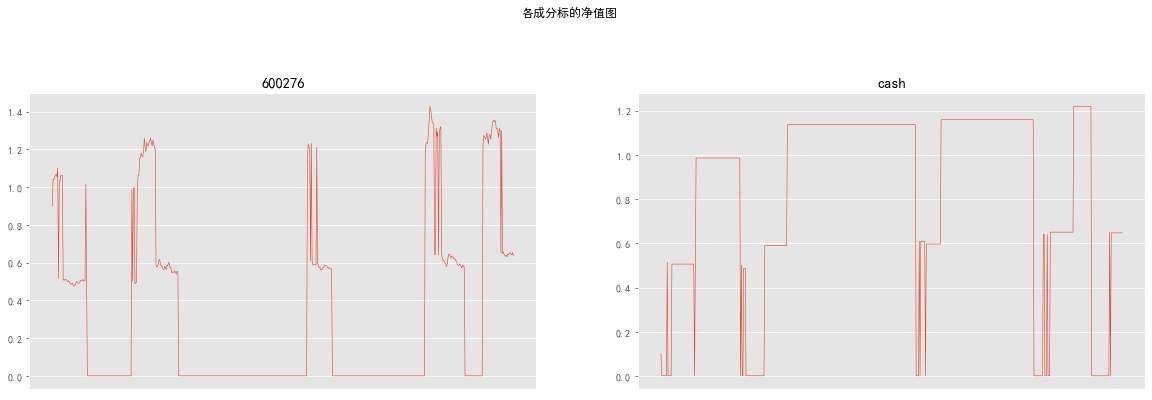

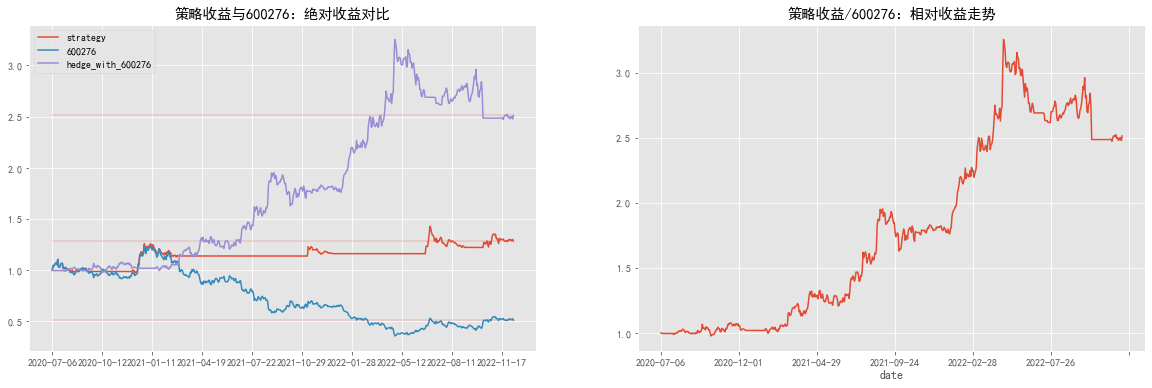

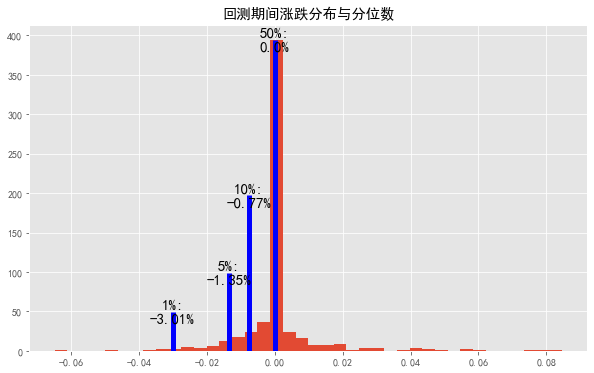

近5日组合净值：
date
2022-12-02    1.300025
2022-12-05    1.290043
2022-12-06    1.290043
2022-12-07    1.301313
2022-12-08    1.283603
dtype: object
近5日组合涨跌：
date
2022-12-02    0.000372
2022-12-05   -0.007678
2022-12-06    0.000000
2022-12-07    0.008736
2022-12-08   -0.013610
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.504803  0.000000
600276  0.495197 -0.027107


In [40]:
test.visualization(control_group='600276')

# 4，总结

基于变异系数的策略cv_strategy通过判断一个周期内的波动变化$\frac{dcv}{dt}$结合最新资产价格与过去一段时间的均值的大小关系来推测未来的资产价格走势，对波动增强且价格高于均值的资产超配，对波动增加且价格低于均值的资产减配，其他情况则维持安全的持仓比例，即“半仓吃瓜”

策略对于风格变化快、难以把握的资产类型可以降低其波动幅度，从而减小该资产对整体组合的影响；

策略对于强势的资产，能同时起到降低波动幅度和争取收益的效果；

策略对于弱势的资产，能起到控制最大回撤，减少参与、避免踩雷的效果。

当股票池足够丰富，策略的胜率也会随之提升。

In [244]:
# ETF持仓
pool_1=['512660','512800',# 军工、银行
        '513330','515220',# 恒生科技、煤炭
        '159996','512010',# 家电、医药
        '159825','159865',# 农业、养殖
        '159732','159995',# 消费电子、芯片
        '518880','501018',# 黄金、原油
        '159766','512690',# 旅游，酒
        '515700','515790',# 新能车、光伏
        '159985',#'511260',# 豆粕期货，十年国债ETF
        '159941', '513030',#'513080',#'513880',#,         # nasdaq,德国，法国cac40，日本225 
        '512980','512720',         # 传媒, 计算机
        '513360','159611'                  # 教育,电力

#       '563000','510300','510500',# 中国A50，hs300, zz500
       ]
am = cv_strategy.cv_strategy(pool_1)
am.get_close(ktype_='M',)
# 价格修正：由于tushare读取的ETF数据未进行复权，因此需要手动对数据进行复权。
am.close.loc['2022-07-05':,'159941']=am.close.loc['2022-07-05':,'159941']/0.604*2.416
am.close.loc[:'2021-05-14','512690'] = am.close.loc[:'2021-05-14','512690']/2.644*0.972
am.close.loc['2021-05-15':'2021-12-30','512690'] = am.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
am.close.loc[:'2021-06-25','512010'] = am.close.loc[:'2021-06-25','512010']/3.206*0.836
am.close.loc[:'2022-12-26','515220'] = am.close.loc[:'2022-12-26','515220']/2.187*2.147
am.close.loc['2023-03-31','513030'] = 1.157

am.run(operation_pct_in=4/len(am.stock_pool),
      operation_pct_out=0.5,
      operation_pct_clr=1,
      period=2)

a = cv_strategy.cv_strategy(pool_1)
a.get_close(ktype_='D',)
a.close.loc['2022-07-05':,'159941']=a.close.loc['2022-07-05':,'159941']/0.604*2.416
a.close.loc[:'2021-05-14','512690'] = a.close.loc[:'2021-05-14','512690']/2.644*0.972
a.close.loc['2021-05-15':'2021-12-30','512690'] = a.close.loc['2021-05-15':'2021-12-30','512690']/1.323*0.973
a.close.loc[:'2021-06-25','512010'] = a.close.loc[:'2021-06-25','512010']/3.206*0.836
a.close.loc[:'2022-12-26','515220'] = a.close.loc[:'2022-12-26','515220']/2.187*2.147

a.run()

2023-07-06-15:12:16
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

买——追涨： 513030
无操作: 512660
无操作: 159825
买——追涨： 159985
无操作: 159611
无操作: 512800
卖——割肉： 518880
2022-06-02
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
卖——逃顶： 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
卖——逃顶： 513030
无操作: 512660
无操作: 159825
卖——逃顶： 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-06-06
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
买——追涨： 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
买——追涨： 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-06-07
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-06-08
无操作: 513330
无操作: 513360
无操作:

无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
买——追涨： 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
买——追涨： 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-12
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
卖——逃顶： 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
卖——逃顶： 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
卖——逃顶： 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-15
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
卖——逃顶： 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-08-16
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 51

卖——逃顶： 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
卖——逃顶： 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-10-31
无操作: 513330
买——追涨： 513360
无操作: 512980
无操作: 515700
无操作: 159995
买——追涨： 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-11-01
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2022-11-02
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996

无操作: 518880
2023-01-09
无操作: 513330
买——追涨： 513360
卖——逃顶： 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
卖——逃顶： 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
买——追涨： 518880
2023-01-10
无操作: 513330
卖——逃顶： 513360
买——追涨： 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
卖——逃顶： 159985
无操作: 159611
无操作: 512800
无操作: 518880
2023-01-11
无操作: 513330
无操作: 513360
卖——逃顶： 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2023-01-12
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作:

卖——逃顶： 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
卖——割肉： 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
卖——逃顶： 512660
无操作: 159825
卖——割肉： 159985
无操作: 159611
无操作: 512800
无操作: 518880
2023-03-17
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
买——追涨： 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
卖——割肉： 512010
无操作: 159941
无操作: 159865
无操作: 501018
卖——割肉： 159996
无操作: 513030
买——追涨： 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2023-03-20
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
卖——逃顶： 512660
无操作: 159825
无操作: 159985
卖——逃顶： 159611
无操作: 512800
无操作: 518880
2023-03-21
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018

无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
买——追涨： 159611
无操作: 512800
无操作: 518880
2023-06-09
无操作: 513330
买——追涨： 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
买——追涨： 513030
无操作: 512660
无操作: 159825
无操作: 159985
无操作: 159611
无操作: 512800
无操作: 518880
2023-06-12
无操作: 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 515220
无操作: 512010
无操作: 159941
无操作: 159865
无操作: 501018
无操作: 159996
无操作: 513030
无操作: 512660
无操作: 159825
无操作: 159985
卖——逃顶： 159611
卖——逃顶： 512800
无操作: 518880
2023-06-13
买——追涨： 513330
无操作: 513360
无操作: 512980
无操作: 515700
无操作: 159995
无操作: 512720
无操作: 512690
无操作: 515790
无操作: 159766
无操作: 159732
无操作: 51

In [245]:
startdate='2023-06-30'
dec_dailyreturn = a.returns.dropna().loc[startdate:]
df_model = a.weight.loc[am.weight.iloc[-2].name:]
df = pd.DataFrame(index = df_model.index,columns=df_model.columns)
df.iloc[0,:] = am.weight.iloc[-2][df.columns]

In [246]:
for i in range(1,len(df)):
    df.iloc[i,:] = df.iloc[i-1,:]*(1+dec_dailyreturn.iloc[i,:])[df.columns]

In [247]:
dfsum = pd.DataFrame(df.T.sum(),columns=['cv_m'])
hs300 = ts.get_k_data('hs300').set_index('date')
hs300 = hs300.loc[startdate:,'close']
dfs = pd.concat([df.T.sum(),hs300],axis=1)
dfs.columns=['cv_m','hs300']
dfs['ex'] = dfs.cv_m/dfs.hs300
dfs=dfs/dfs.iloc[0]

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


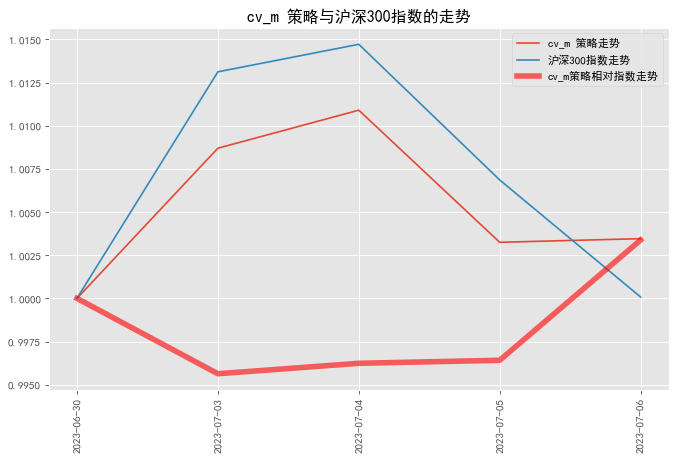

In [248]:
plt.style.use('ggplot')
plt.figure(figsize=[10,6],dpi=80)
plt.title('cv_m 策略与沪深300指数的走势')
plt.plot(dfs.cv_m,label='cv_m 策略走势')
plt.plot(dfs.hs300,label='沪深300指数走势')
plt.plot(dfs.ex,lw=5,alpha=0.6,color='red',label='cv_m策略相对指数走势')
plt.xticks(dfs.index,rotation=90)
plt.legend()
plt.show()

In [249]:
am.weight.iloc[-1].sort_values()

515790         0.0
512800         0.0
512010         0.0
159865         0.0
159766         0.0
159825         0.0
512980         0.0
501018         0.0
159995         0.0
515700         0.0
512690         0.0
513330         0.0
515220         0.0
159611    0.002318
512660    0.036275
159996    0.036321
513360     0.03701
159985    0.038904
518880    0.045674
159732    0.067294
513030    0.070796
159941    0.077184
512720    0.078928
cash      0.541147
Name: 2023-07-06, dtype: object

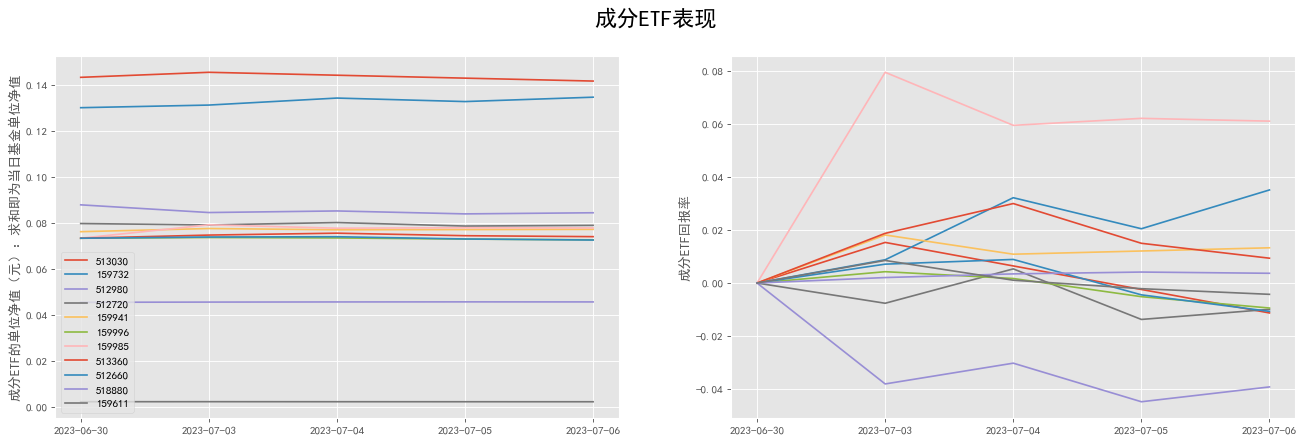

In [250]:
pt = df.T.sort_values(startdate,ascending=False).iloc[:12].T
aa = pt.columns.to_list()
aa.remove('cash')
pt=pt[aa]
fig = plt.figure(figsize=[20,6],dpi=80)
ax1 = plt.subplot(121)
ax1.set_ylabel('成分ETF的单位净值（元）：求和即为当日基金单位净值')
for i in pt.columns:
    if i != 'cash':
        ax1.plot(pt[i],label=i)
    
ax1.legend()
ax2=plt.subplot(122)
ax2.plot((pt/pt.iloc[0])-1)
ax2.set_ylabel('成分ETF回报率')

fig.suptitle('成分ETF表现',fontsize=20)
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


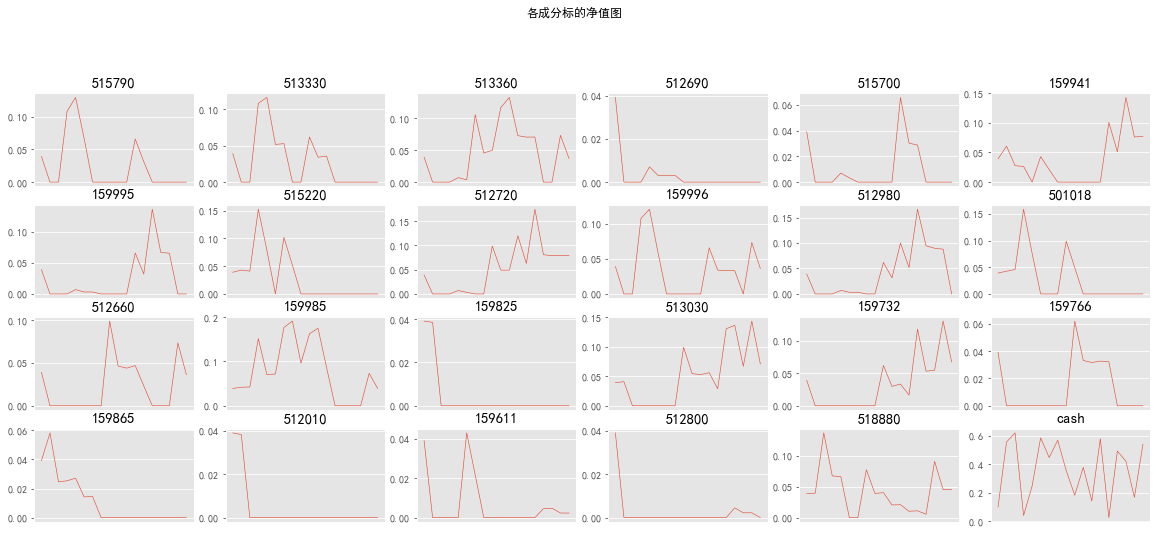

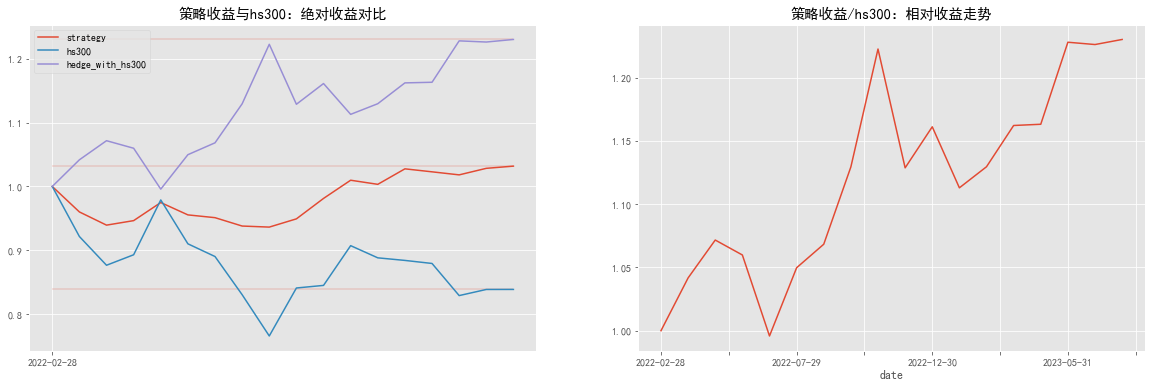

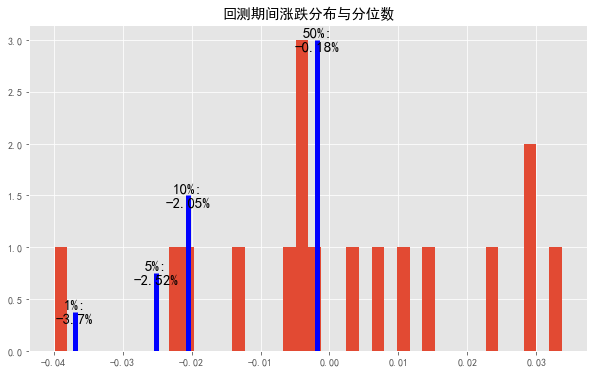

近5日组合净值：
date
2023-03-31    1.027618
2023-04-28    1.022931
2023-05-31    1.018168
2023-06-30    1.028406
2023-07-06    1.031851
dtype: object
近5日组合涨跌：
date
2023-03-31    0.024190
2023-04-28   -0.004561
2023-05-31   -0.004657
2023-06-30    0.010056
2023-07-06    0.003350
dtype: float64
今日持仓比例与涨跌幅：
              仓位      今日涨幅
cash    0.524443  0.000000
512720  0.076492 -0.009909
159941  0.074801  0.013285
513030  0.068611 -0.011281
159732  0.065217  0.035088
518880  0.044264  0.003679
159985  0.037703  0.061021
513360  0.035868  0.009363
159996    0.0352 -0.009418
512660  0.035155 -0.010676
159611  0.002246 -0.004255
512010       0.0 -0.007059
501018       0.0  0.020871
159995       0.0  0.016175
512800       0.0 -0.008380
512980       0.0 -0.039150
159865       0.0 -0.004348
513330       0.0 -0.004831
159825       0.0 -0.003947
515220       0.0  0.026647
515700       0.0 -0.002975
515790       0.0 -0.024135
159766       0.0  0.034247
512690       0.0  0.003927


In [251]:
am.visualization(control_group='hs300')

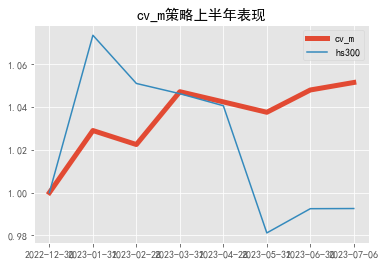

In [252]:
qq = ((am.compare/(am.compare.loc['2022-12-30'])).iloc[-8:])
plt.plot(qq.strategy,label='cv_m',lw=5)
plt.plot(qq.hs300,label='hs300')
plt.title('cv_m策略上半年表现')
plt.legend()

In [63]:
dfs.min()

cv_m            0.996334
hs300           0.997578
ex              0.988569
max_over_min        None
dtype: object

In [221]:
cb_balance = ak.macro_china_central_bank_balance()
cb_balance

100%|██████████████████████████████████████████| 10/10 [00:02<00:00,  3.48it/s]


,统计时间,国外资产,外汇,货币黄金,其他国外资产,对政府债权,其中:中央政府,对其他存款性公司债权,对其他金融性公司债权,对非货币金融机构债权,...,对金融机构负债,准备金存款,非金融性公司存款,活期存款,债券,国外负债,政府存款,自有资金,其他负债,总负债
0,2023.4,231338.37,217895.06,3385.10,10058.21,15240.68,15240.68,137902.30,1562.72,None,...,None,None,None,None,1000.00,1503.96,44984.57,219.75,6784.49,412654.20
1,2023.3,230941.18,217893.63,3349.50,9698.05,15240.68,15240.68,146628.42,1564.52,None,...,None,None,None,None,950.00,1652.61,41318.08,219.75,6690.57,421007.27
2,2023.2,229061.80,216182.12,3270.77,9608.91,15240.68,15240.68,143390.44,1551.26,None,...,None,None,None,None,950.00,1571.72,51300.31,219.75,7291.16,417679.36
3,2023.1,228513.62,216249.25,3169.49,9094.88,15240.68,15240.68,148166.96,1548.67,None,...,None,None,None,None,950.00,1925.11,47736.54,219.75,7093.77,422064.71
4,2022.12,226906.56,214712.28,3106.57,9087.71,15240.68,15240.68,143132.29,1557.00,None,...,None,None,None,None,950.00,1574.47,41272.91,219.75,6602.21,416783.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1994.3,2437.60,2253.80,12.00,171.80,None,1582.80,None,258.70,None,...,None,None,1369.40,None,None,None,635.40,280.50,-298.60,None
312,1993.12,1549.50,1431.80,12.00,105.70,None,1582.70,None,251.70,None,...,None,None,1291.70,None,None,None,473.40,310.30,-255.00,None
313,1993.9,1451.00,1332.20,12.00,106.80,None,1399.80,None,144.70,None,...,None,None,1198.00,None,None,None,414.50,310.30,-286.50,None
314,1993.6,1286.50,1183.00,12.00,91.50,None,1373.70,None,199.30,None,...,None,None,1108.90,None,None,None,340.40,310.30,-411.60,None


In [222]:
cb_balance.columns

Index(['统计时间', '国外资产', '外汇', '货币黄金', '其他国外资产', '对政府债权', '其中:中央政府',
       '对其他存款性公司债权', '对其他金融性公司债权', '对非货币金融机构债权', '对非金融性公司债权', '其他资产', '总资产',
       '储备货币', '发行货币', '金融性公司存款', '其他存款性公司', '其他金融性公司', '对金融机构负债', '准备金存款',
       '非金融性公司存款', '活期存款', '债券', '国外负债', '政府存款', '自有资金', '其他负债', '总负债'],
      dtype='object')

In [227]:
cb_balance.to_excel(r'D:\jwli\cb_balance.xls')

<ipython-input-227-84051eb24856>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  cb_balance.to_excel(r'D:\jwli\cb_balance.xls')


---

2023-02-23-13:21:25
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/doc

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽

<ipython-input-146-493c1a615878>:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(2,2,j)


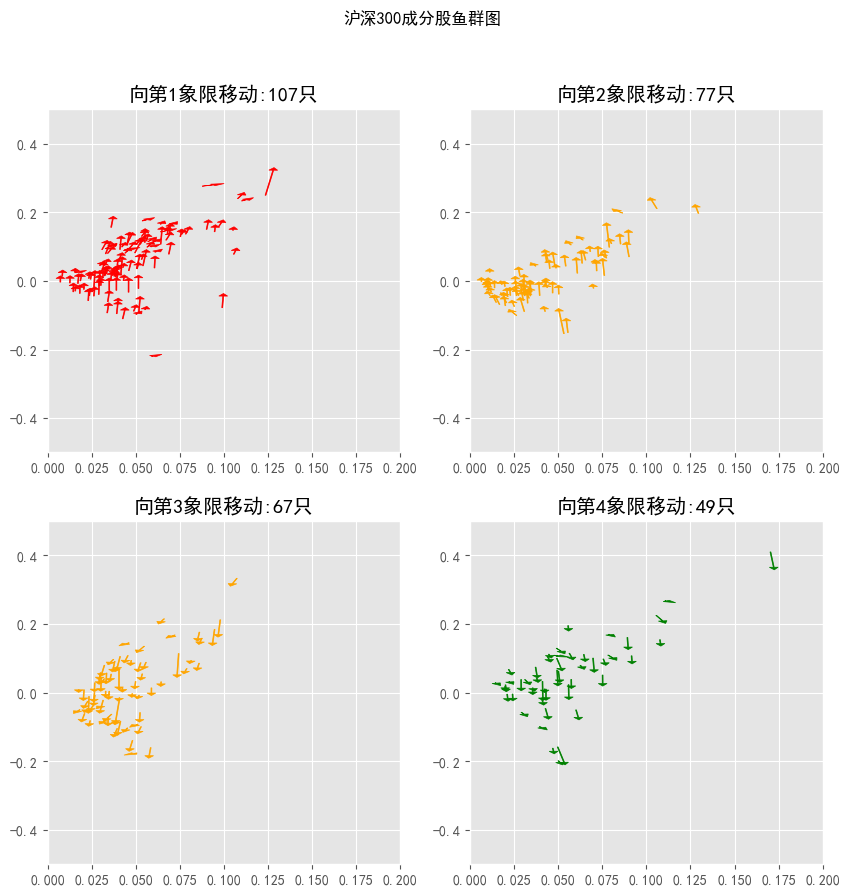

In [146]:
hs300_list = pd.read_excel(r'./hs300.xlsx',sheet_name=1).dropna()
hs300_list = [i[:6] for i in hs300_list['证券代码']]
hs300_pool = cv_strategy.cv_strategy(hs300_list)
hs300_pool.get_close()
area = hs300_pool.close
prd = 50
cv = area.rolling(prd).std()/area.rolling(prd).mean()
cv.dropna(inplace=True)
cv = cv.iloc[1:]
rtn = area/area.shift(prd)
rtn.dropna(inplace=True)
rtn = rtn.applymap(lambda x:np.log(x))
# fig = plt.figure(figsize=[10,10],dpi=80)
# ax1 = plt.subplot()
# # ax1.scatter(x = cv.iloc[-1],y = rtn.iloc[-1],alpha=.6,marker='o')
# # ax1.scatter(x = cv.iloc[-2],y = rtn.iloc[-2],alpha=.6,marker='o')
# for i in range(len(cv.iloc[-1])):
#     ax1.arrow(x=cv.iloc[-2,i], y=rtn.iloc[-2,i], dx = cv.iloc[-1,i]-cv.iloc[-2,i],dy = rtn.iloc[-1,i]-rtn.iloc[-2,i],
#               length_includes_head=True,width=0.0005,head_width=0.003)
# plt.scatter(x2,np.log(y2),alpha=0.2)
dcv = cv-cv.shift(1)
dcv.dropna(inplace=True)
# dcv = dcv.iloc[1:]
drtn=rtn-rtn.shift(1)
drtn.dropna(inplace=True)
vel = pd.DataFrame(columns=dcv.columns,index=dcv.index)
for i in range(len(dcv.columns)):
    for j in range(len(dcv.index)):
        if dcv.iloc[j,i]>0 and drtn.iloc[j,i]>0:
            vel.iloc[j,i] = 1
        elif dcv.iloc[j,i]<0 and drtn.iloc[j,i]>0:
            vel.iloc[j,i] = 2
        elif dcv.iloc[j,i]<0 and drtn.iloc[j,i]<0:
            vel.iloc[j,i] = 3
        elif dcv.iloc[j,i]>0 and drtn.iloc[j,i]<0:
            vel.iloc[j,i] = 4


# aset = cv.iloc[-1][cv.iloc[-1]>0].index.to_list()
# bset = rtn.iloc[-1][rtn.iloc[-1]>0].index.to_list()
# area_1 = [i for i in aset if i in bset]
# x = cv.iloc[-1][area_1]
# y = rtn.iloc[-1][area_1]
# plt.scatter(x=x,y=y)
fig=plt.figure(figsize=[10,10],dpi=100)
fig.suptitle('沪深300成分股鱼群图')
colors = ['red','orange','orange','green']
for j in range(1,5):
    a1 = (vel.iloc[-1][vel.iloc[-1]==j]).index
    a1x=cv[a1].iloc[-2]
    a1y=rtn[a1].iloc[-2]
    a1dx=dcv[a1].iloc[-1]
    a1dy=drtn[a1].iloc[-1]
    for i in range(len(a1)):
        ax=plt.subplot(2,2,j)
        ax.set_xlim(0,.2)
        ax.set_ylim(-.5,.5)
        ax.arrow(x=a1x[i],y=a1y[i],dx=a1dx[i],dy=a1dy[i],width=0.0005,head_width=0.005,color=colors[j-1])
        ax.set_title('向第{}象限移动:{}只'.format(j,len(a1)))

In [159]:
frames = len(cv)
data = [(cv.iloc[i], rtn.iloc[i]) for i in range(frames)]

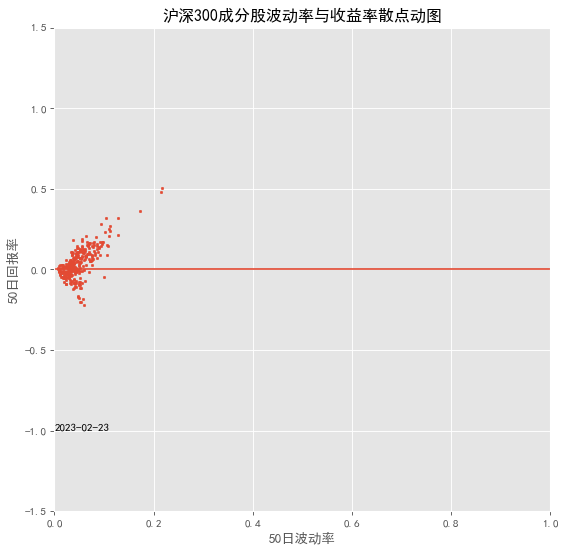

In [160]:
fig = plt.figure(figsize=[8,8],dpi=80)
ax = plt.subplot()
ax.set_xlim(0,1)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('50日波动率')
ax.set_ylabel('50日回报率')
ax.hlines(xmin=0,xmax=1,y=0)
s=ax.scatter([],[],s=5,)
t = ax.text(0,-1,'')
ax.set_title('沪深300成分股波动率与收益率散点动图')
def anima(i):
    s.set_offsets(np.array([data[i][0], data[i][1]]).T)
    t.set_text(data[i][0].name)
ani=animation.FuncAnimation(fig,anima,frames=frames,interval=200)
ani.save('bb.gif')

In [300]:
aa = ts.get_k_data('513330').set_index('date')
aa

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,close,high,low,volume,code
date,,,,,,
2021-02-08,1.006,1.001,1.012,0.993,8808050.0,513330
2021-02-09,1.005,1.008,1.014,0.999,6368694.0,513330
2021-02-10,1.020,1.044,1.045,1.020,8463041.0,513330
2021-02-18,1.100,1.069,1.109,1.066,13076993.0,513330
2021-02-19,1.069,1.064,1.069,1.037,6962408.0,513330
...,...,...,...,...,...,...
2023-02-24,0.449,0.443,0.449,0.440,47696083.0,513330
2023-02-27,0.436,0.435,0.445,0.434,61892203.0,513330
2023-02-28,0.439,0.431,0.441,0.428,59794325.0,513330


<AxesSubplot:>

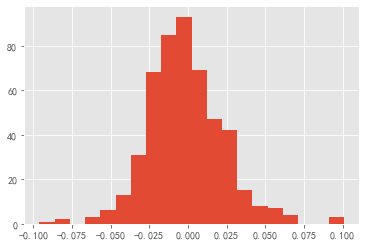

In [303]:
aa['returns'] = aa.close.pct_change()
aa.returns.hist(bins=20)

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [90]:
df = ts.get_k_data('hs300',start='2000-01-01').set_index('date')
df['history_return_240'] = (df.close)/(df.close.shift(240))
df['future_return_240'] = (df.close.shift(-240))/(df.close)
df['rocma10'] = df['history_return_240'].rolling(10).mean()
df['d_rocma'] = df['rocma10'] - df['rocma10'].shift(1)


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [91]:
df1 = df.iloc[-1750:]
roc = 0.93

<AxesSubplot:>

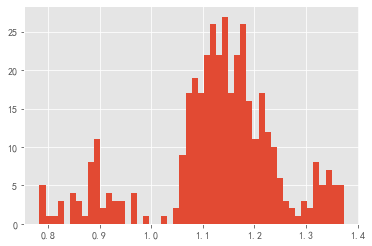

In [92]:
# df1[(df1['history_return_240']<=roc)&(df1['d_rocma']>0)]['future_return_240'].hist(bins=50)
# df1[(df1['history_return_240']<=roc)&(df1['d_rocma']<0)]['future_return_240'].hist(bins=50,alpha=0.4)
df1[(df1['history_return_240']<=roc)]['future_return_240'].hist(bins=50,alpha=1)

In [96]:
fr = df1[df1['history_return_240']<=roc]['future_return_240'].dropna()
print(np.percentile(fr,[1,5,10,20,50,80,90,95,99]))

[0.79492967 0.88099154 0.91585121 1.07685633 1.14038125 1.21244217
 1.25804753 1.33125277 1.3620961 ]


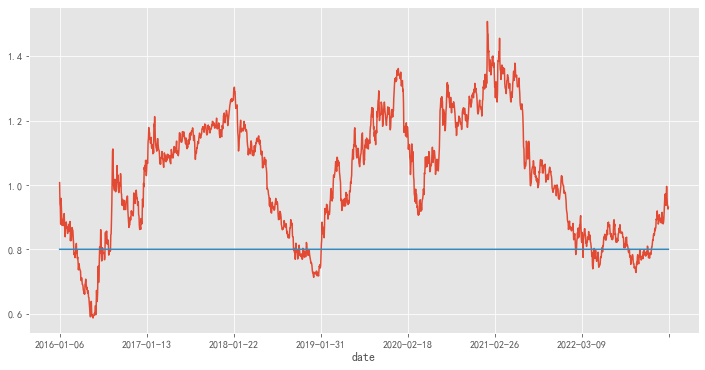

In [97]:
df1.history_return_240.plot(figsize=[12,6])
plt.plot(df1.history_return_240.index,np.ones_like(df1.history_return_240.index)*0.8)

<AxesSubplot:>

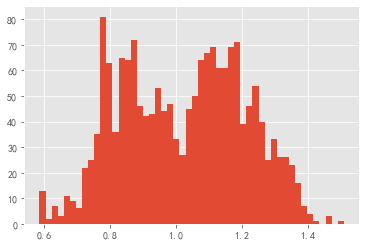

In [69]:
df1['history_return_240'].hist(bins=50)

In [ ]:
df1.close.pctchange()

In [13]:
def peak_amount(a):
    a_mid = a[1:-1]
    a_front = a[0:-2]
    a_bhind = a[2:]
    l1 = [a_mid[i] for i in range(len(a_mid)) if a_mid[i] > a_front[i] and a_mid[i] > a_bhind[i]]
    l2 = [a_mid[i] for i in range(len(a_mid)) if a_mid[i] < a_front[i] and a_mid[i] < a_bhind[i]]
    print('极大值个数：',len(l1))
    print('极小值个数：',len(l2))
    return len(l1)+len(l2)

In [15]:
peak_amount(df['history_return_240'].rolling(10).mean())

极大值个数： 297
极小值个数： 297


594